<a href="https://colab.research.google.com/github/Yashodha-kapali8/ML_Programs/blob/main/LinearRegression_Activity.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Activity to do:**

1. Display the coefficients and intercept
2. Implement Linear Regression on Boston Housing Data to demonstrate multiple linear regression
3. Use the obtained coefficent and intecept to compute new_pressure for new_temperature = 40 and verify the result by executing the relevant code block
4. Implement other evaluation metrics: MSE, RMSE, RelMSE and CV



Model Coefficients:
CRIM: -0.11305592398537989
ZN: 0.030110464145648292
INDUS: 0.04038072041333043
CHAS: 2.7844382035079276
NOX: -17.202633391781117
RM: 4.43883519951305
AGE: -0.006296362210980761
DIS: -1.447865368530786
RAD: 0.26242973558509075
TAX: -0.010646786275308524
PTRATIO: -0.915456240468073
B: 0.012351334729969077
LSTAT: -0.5085714244487918
Intercept: 30.2468

Mean Absolute Error (MAE): 3.1891
Mean Squared Error (MSE): 24.2911
Root Mean Squared Error (RMSE): 4.9286
Relative MSE (RelMSE): 0.0526
Coefficient of Variation (CV): 0.2294

Predicted price when RM = 40 (model): 172.1422
Manual prediction using coefficients: 172.1422


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


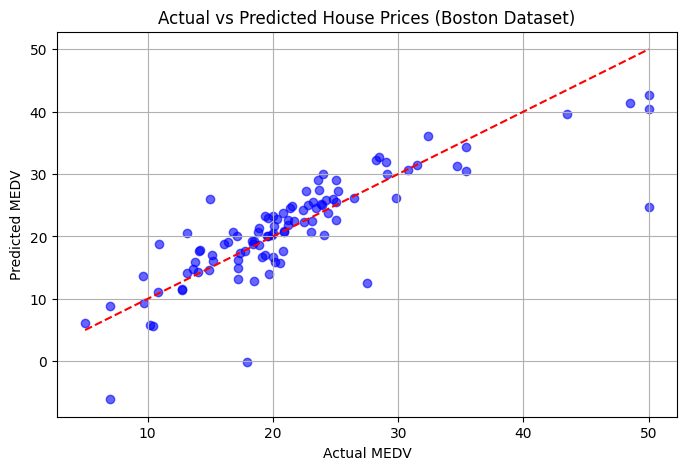

In [24]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_openml
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error
from math import sqrt
from sklearn.model_selection import train_test_split

# Step 1: Load and preprocess dataset
boston = fetch_openml(name='boston', version=1, as_frame=True)
X = boston.data.astype(float)
y = boston.target.astype(float).to_numpy()

# Step 2: Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# Step 3: Train the model
model = LinearRegression()
model.fit(X_train, y_train)

# Step 4: Display coefficients and intercept
print("Model Coefficients:")
for feature, coef in zip(X.columns, model.coef_):
    print(f"{feature}: {coef}")
print(f"Intercept: {model.intercept_:.4f}")

# Step 5: Predict on test set
y_pred = model.predict(X_test)

# Step 6: Evaluation metrics
mse = mean_squared_error(y_test, y_pred)
rmse = sqrt(mse)
mae = mean_absolute_error(y_test, y_pred)
rel_mse = mse / (np.mean(y_test) ** 2)
cv = rmse / np.mean(y_test)

print(f"\nMean Absolute Error (MAE): {mae:.4f}")
print(f"Mean Squared Error (MSE): {mse:.4f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.4f}")
print(f"Relative MSE (RelMSE): {rel_mse:.4f}")
print(f"Coefficient of Variation (CV): {cv:.4f}")

# Step 7: Prediction for new value where RM = 40
new_input = X.mean().values.reshape(1, -1)
rm_index = list(X.columns).index('RM')
new_input[0][rm_index] = 40

# Model prediction
new_prediction = model.predict(new_input)
print(f"\nPredicted price when RM = 40 (model): {new_prediction[0]:.4f}")

# Manual computation
manual_prediction = np.dot(new_input, model.coef_) + model.intercept_
print(f"Manual prediction using coefficients: {manual_prediction[0]:.4f}")

# Step 8: Plot actual vs predicted
plt.figure(figsize=(8, 5))
plt.scatter(y_test, y_pred, alpha=0.6, color='blue')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], 'r--')
plt.xlabel("Actual MEDV")
plt.ylabel("Predicted MEDV")
plt.title("Actual vs Predicted House Prices (Boston Dataset)")
plt.grid(True)
plt.show()
